###SUMMARY

Census Income Data Set



Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_file=r'/Users/drram/Documents/adult.data.csv'
col_names=['age','workplace','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native-country','salary']
cen=pd.read_csv(csv_file,names=col_names)
cen.head()

,age,workplace,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
cen

,age,workplace,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
cen.tail()

,age,workplace,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
#check datatype
cen.dtypes

age                int64
workplace         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native-country    object
salary            object
dtype: object

In [6]:
#check the shape
cen.shape

(32561, 15)

In [7]:
cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workplace       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#check null values
cen.isnull().sum()

age               0
workplace         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native-country    0
salary            0
dtype: int64

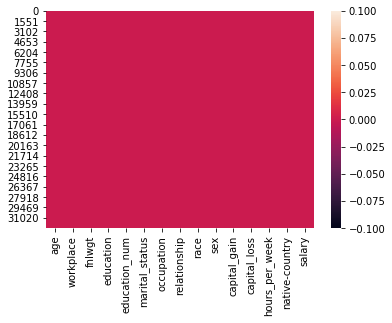

In [9]:
#grsphicsl represntstion of null values
sns.heatmap(cen.isnull())

In [10]:
#check if there is any missing value present or not
cen['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [11]:
cen['workplace'].value_counts()
#as it can be seen that there are 1836 missing values denoted by '?'

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workplace, dtype: int64

In [12]:
cen['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64

In [13]:
cen['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [14]:
cen['education_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [15]:
cen['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [16]:
cen['occupation'].value_counts()
#there are missing values 1843

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
cen['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [18]:
cen['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [19]:
cen['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [20]:
cen['capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64

In [21]:
cen['capital_loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64

In [22]:
cen['hours_per_week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours_per_week, Length: 94, dtype: int64

In [23]:
cen['native-country'].value_counts()
#as we can see there are 583 missing values

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [24]:
cen['salary'].value_counts()
#we can see 24720 employee are having <=50k salary and 7841 having >50k

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

##observations-
1. the missing values are represnted by '?' in the above dataset.
2. there are 1836 missing values in column 'workplace'.
3. there are 1843 missing values in column 'occupation'.
4. there are 583 missing values in column 'native-country'.

In [25]:
#now next we can fill those missing values either by- median/mode or the most repeated value..
cen['workplace']=cen['workplace'].replace('?','Private')
cen['occupation']=cen['occupation'].replace('?',cen['occupation'].mode()[0])
cen['native-country']=cen['native-country'].replace('?',cen['native-country'].mode()[0])


In [26]:
cen.dtypes

age                int64
workplace         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native-country    object
salary            object
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
cen['workplace']=pd.DataFrame(le.fit_transform(cen['workplace']))

In [29]:
cen['marital_status']=pd.DataFrame(le.fit_transform(cen['marital_status']))
cen['education']=pd.DataFrame(le.fit_transform(cen['education']))
cen['occupation']=pd.DataFrame(le.fit_transform(cen['occupation']))
cen['relationship']=pd.DataFrame(le.fit_transform(cen['relationship']))
cen['race']=pd.DataFrame(le.fit_transform(cen['race']))
cen['sex']=pd.DataFrame(le.fit_transform(cen['sex']))
cen['native-country']=pd.DataFrame(le.fit_transform(cen['native-country']))

In [30]:
cen['salary']=cen['salary'].replace(np.nan,'<50K')


In [31]:
cen.dtypes

age                int64
workplace          int64
fnlwgt             int64
education          int64
education_num      int64
marital_status     int64
occupation         int64
relationship       int64
race               int64
sex                int64
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native-country     int64
salary            object
dtype: object

##STATISTICAL ANALYSIS

In [32]:
cen.describe()

,age,workplace,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native-country
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


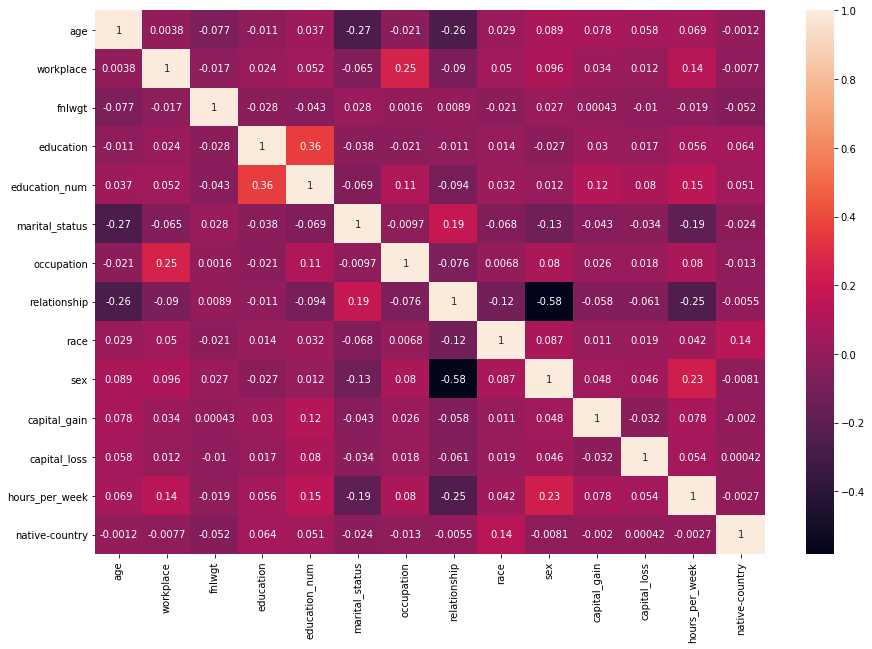

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(cen.corr(), annot=True)

In [34]:
cen.corr()

,age,workplace,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native-country
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151
workplace,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288
education_num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840
marital_status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852
sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119


##OBSERVATIONS-
1. It from above correlation we can see that 'age' is negatively corr with education,marrital_status, occupation,native_country, relationship.
2. salary is negatively corr with relationship, marrital_status and fnlwgt, while positively corr with all other attributes.
3. occupation is negatively corr with age, education, marital_status, relationship,native-country while positively corr with all others.


###BIVARIATE ANALYSIS

In [35]:
cen['salary']=pd.DataFrame(le.fit_transform(cen['salary']))

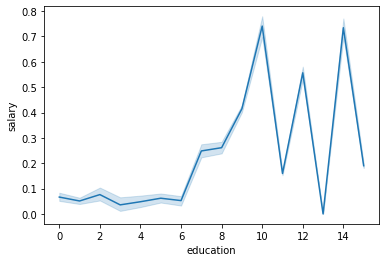

In [36]:
sns.lineplot(x='education',y='salary',data=cen)

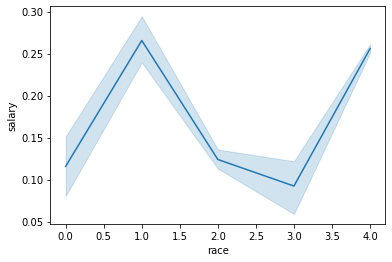

In [37]:
sns.lineplot(x='race',y='salary', data= cen)

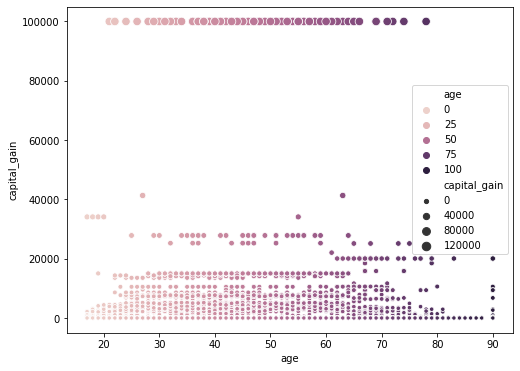

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='capital_gain',hue='age',size='capital_gain', data=cen)

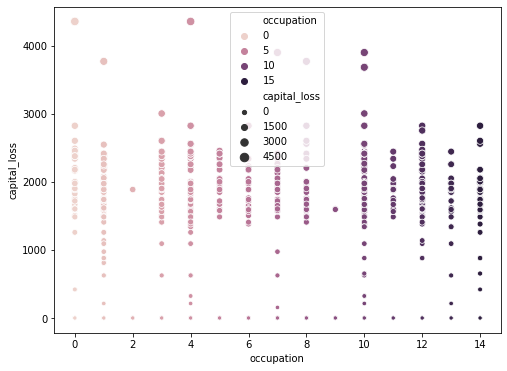

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='occupation',y='capital_loss',hue='occupation',size='capital_loss', data=cen)

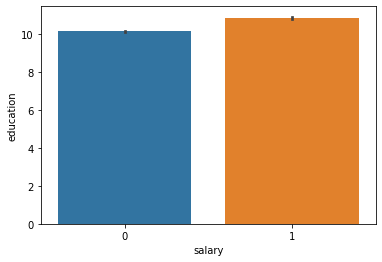

In [40]:
sns.barplot(x='salary',y='education', data=cen)

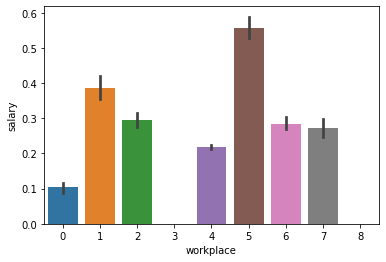

In [41]:
sns.barplot(x='workplace',y='salary', data=cen)

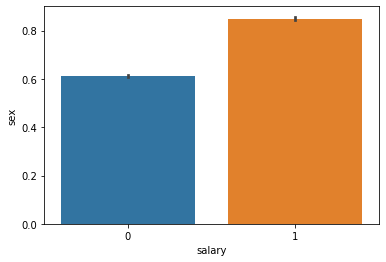

In [42]:
sns.barplot(x='salary',y='sex', data=cen)

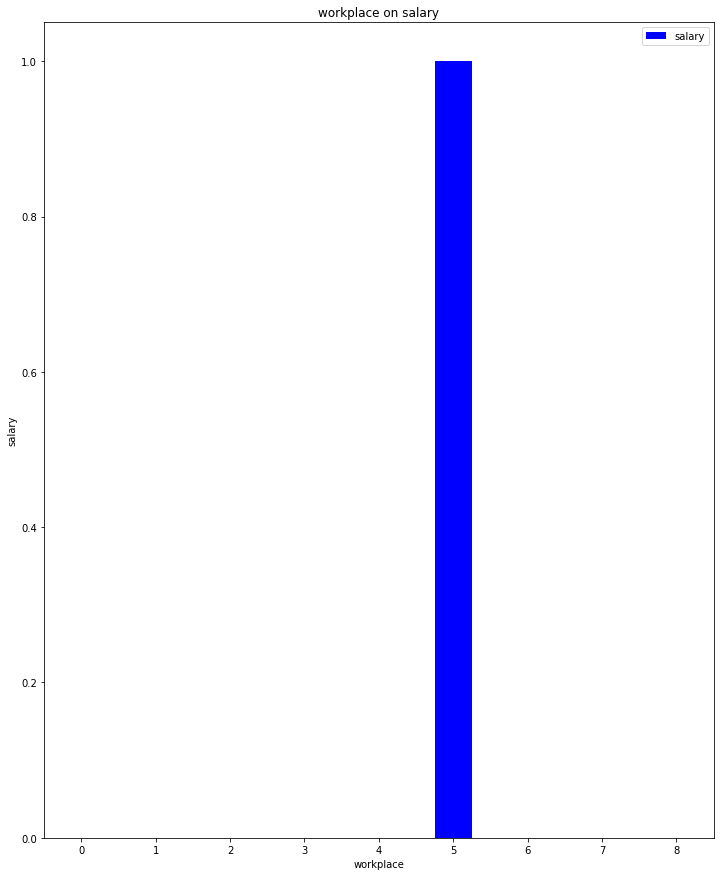

In [43]:
workplace_pivot=\
cen.pivot_table(index='workplace',values='salary',aggfunc=np.median)
workplace_pivot.plot(kind='bar',color='blue',figsize=(12,15))
plt.xlabel('workplace')
plt.ylabel('salary')
plt.title('workplace on salary')
plt.xticks(rotation=0)
plt.show()

##UNIVARIATE ANALYSIS

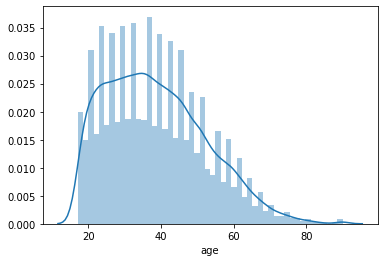

In [44]:
sns.distplot(cen['age'])

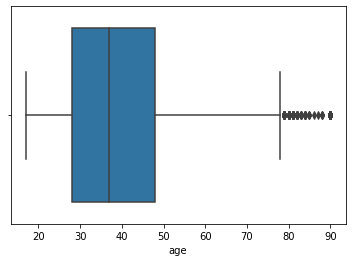

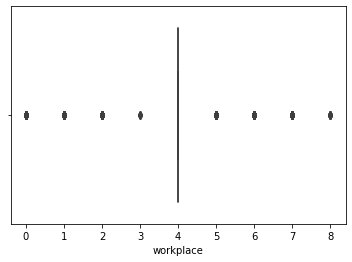

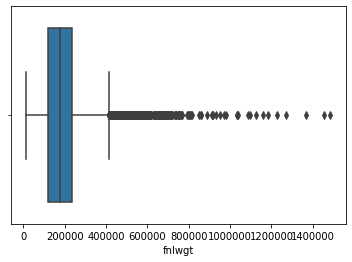

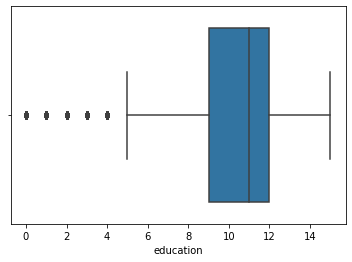

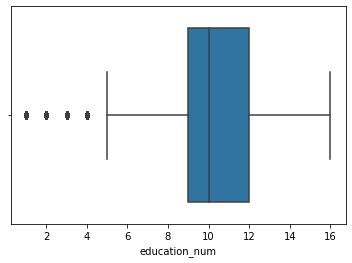

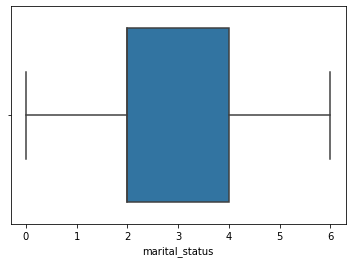

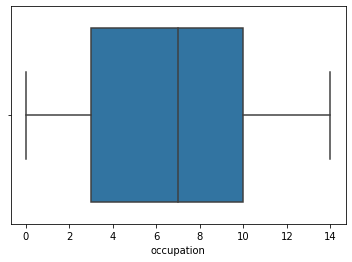

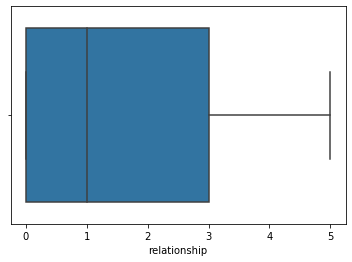

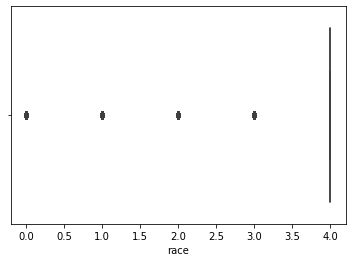

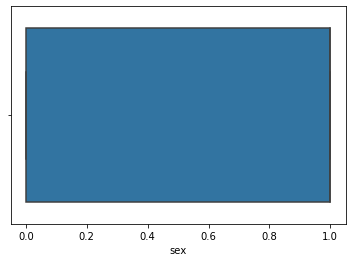

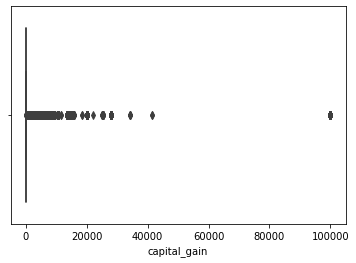

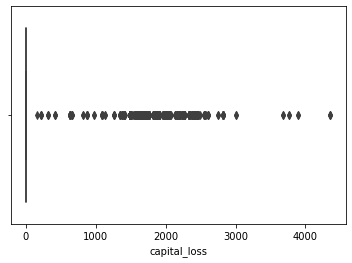

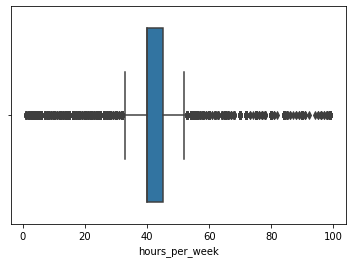

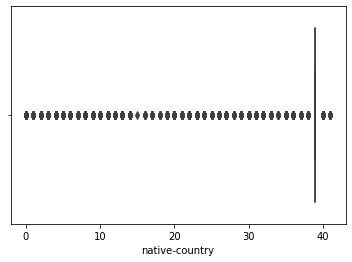

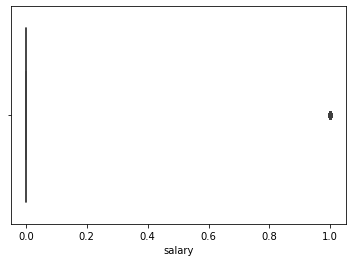

In [45]:
for i in cen.describe().columns:
    sns.boxplot(cen[i].dropna())
    plt.show()

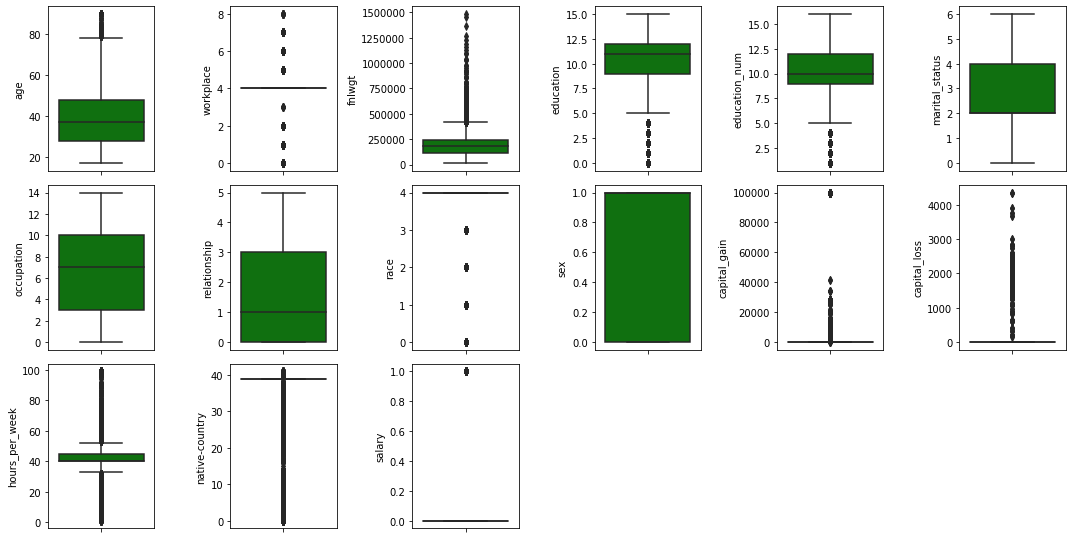

In [46]:
col_list=cen.columns.values
plt.figure(figsize=(15,15))
for i in range (0,len(col_list)):
    if cen[col_list[i]].dtype!='O':
        plt.subplot(6,6,i+1)
        sns.boxplot(cen[col_list[i]], color='green',orient='v')
        plt.tight_layout()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

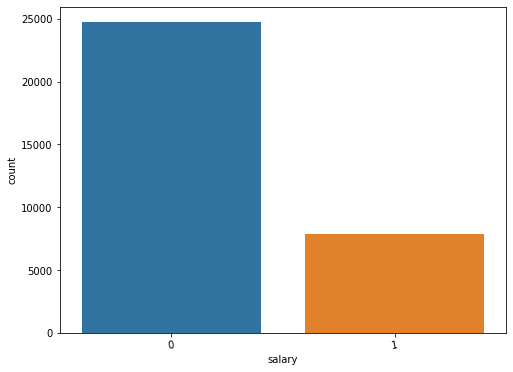

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(cen['salary'])
plt.xticks(rotation=10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

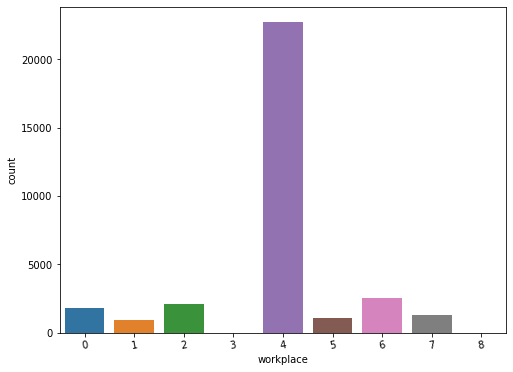

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(cen['workplace'])
plt.xticks(rotation=10)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

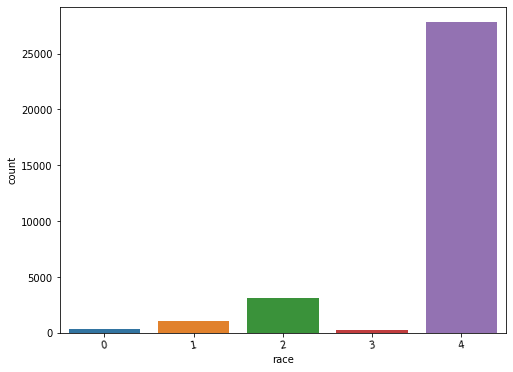

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(cen['race'])
plt.xticks(rotation=10)

##Further Analysis of dataset

In [50]:
cen.groupby('salary').mean()

,age,workplace,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native-country
salary,,,,,,,,,,,,,,
0,36.783738,3.826578,190340.86517,10.125324,9.595065,2.780906,6.393002,1.673422,3.631513,0.611974,148.752468,53.142921,38.840210,36.649070
1,44.249841,4.002296,188005.00000,10.843260,11.611657,2.078816,7.139395,0.730519,3.774136,0.849637,4006.142456,195.001530,45.473026,36.938911


observations-
1. age of near 36 yrs are earning equal or less than 50k in a year, while 44yrs are earning more than 50k.
2. white race are almost equal under less or more than 50k.
3. no. of males are earning >50k

##REMOVING OUTLIERS AND SKEWNESS

In [51]:
print("shape of data before removing outliers", cen.shape)

print()

print("Skewness of the dataset before removing outliers")
print(cen.skew())

from scipy.stats import zscore
z=np.abs(zscore(cen))


cen=cen[(z<3).all(axis=1)]

print('New Shape',cen.shape)




shape of data before removing outliers (32561, 15)

Skewness of the dataset before removing outliers
age                0.558743
workplace         -0.752024
fnlwgt             1.446980
education         -0.934042
education_num     -0.311676
marital_status    -0.013508
occupation         0.114583
relationship       0.786818
race              -2.435386
sex               -0.719293
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
native-country    -3.658303
salary             1.212430
dtype: float64
New Shape (27418, 15)


In [52]:
#reducing skewness using sqrt function
for col in cen.columns:
    if cen.skew().loc[col]>0.55:
        cen[col]=np.sqrt(cen[col])

In [53]:
cen.skew()

age                0.483480
workplace         -0.737714
fnlwgt            -0.113041
education         -0.957433
education_num     -0.144018
marital_status    -0.044388
occupation         0.131200
relationship       0.118374
race              -2.592997
sex               -0.684173
capital_gain       3.685090
capital_loss      26.272250
hours_per_week    -0.358404
native-country    -5.460784
salary             1.324975
dtype: float64

In [54]:
#we need to encode all the categorical values using labelencoder
for i in cen.columns:
    if cen.columns.dtype=='O':
        cen[i]=le.fit_transform(cen[i])



In [55]:
cen.head()

,age,workplace,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native-country,salary
0,22,7,2332,8,10,4,1,1,2,1,24,0,36,23,0
1,33,6,2539,8,10,2,4,0,2,1,0,0,9,23,0
2,21,4,12501,10,6,0,6,1,2,1,0,0,36,23,0
3,36,4,13599,1,4,2,6,0,0,1,0,0,36,23,0
5,20,4,15693,11,11,2,4,5,2,0,0,0,36,23,0


##SPLITTING THE DATA INTO TARGET AND INPUT VARIABLES

In [56]:
x=cen.drop('salary',axis=1)
y=pd.DataFrame(cen['salary']) 

In [57]:
x.shape

(27418, 14)

In [58]:
y.shape

(27418, 1)

In [59]:
x.head()

,age,workplace,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native-country
0,22,7,2332,8,10,4,1,1,2,1,24,0,36,23
1,33,6,2539,8,10,2,4,0,2,1,0,0,9,23
2,21,4,12501,10,6,0,6,1,2,1,0,0,36,23
3,36,4,13599,1,4,2,6,0,0,1,0,0,36,23
5,20,4,15693,11,11,2,4,5,2,0,0,0,36,23


In [60]:
y.head()

,salary
0,0
1,0
2,0
3,0
5,0


In [61]:
y.tail()

,salary
32556,0
32557,1
32558,0
32559,0
32560,1


In [62]:
y.head()

,salary
0,0
1,0
2,0
3,0
5,0


In [63]:
cen['salary'].value_counts()

0    21280
1     6138
Name: salary, dtype: int64

##IMPORTING NECESSARY LIBRARIES

#since the target is classification type, so the classification algorithm will be used.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


##FINDING OUT THE BEST RANDOM_STATE

In [65]:
max_acc_score = 0

for i in range(42,101):
    r_state = i
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = r_state ,test_size=0.30)
    lr = LogisticRegression()
    
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    
    acc_score=accuracy_score(pred,y_test)
    print("The Accuracy Score at random state",i, "is",acc_score)
    
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state = r_state
        
print("The Maximum Accuracy Score ",max_acc_score,"is accumulated at",final_r_state)

The Accuracy Score at random state 42 is 0.7911500121565767
The Accuracy Score at random state 43 is 0.8092633114514952
The Accuracy Score at random state 44 is 0.799781181619256
The Accuracy Score at random state 45 is 0.7904206175540968
The Accuracy Score at random state 46 is 0.7923656698273767
The Accuracy Score at random state 47 is 0.8020909311937758
The Accuracy Score at random state 48 is 0.7986870897155361
The Accuracy Score at random state 49 is 0.799538050085096
The Accuracy Score at random state 50 is 0.7962557743739364
The Accuracy Score at random state 51 is 0.7973498662776562
The Accuracy Score at random state 52 is 0.799416484318016
The Accuracy Score at random state 53 is 0.8110867979576951
The Accuracy Score at random state 54 is 0.7905421833211768
The Accuracy Score at random state 55 is 0.8079260880136153
The Accuracy Score at random state 56 is 0.8051300753707756
The Accuracy Score at random state 57 is 0.8107221006564551
The Accuracy Score at random state 58 is 0.

In [66]:
max_acc_score = 0

for i in range(42,101):
    r_state = i
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = r_state ,test_size=0.30)
    dt = DecisionTreeClassifier()
    
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    
    acc_score=accuracy_score(pred,y_test)
    print("The Accuracy Score at random state",i, "is",acc_score)
    
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state = r_state
        
print("The Maximum Accuracy Score ",max_acc_score,"is accumulated at",final_r_state)

The Accuracy Score at random state 42 is 0.8009968392900559
The Accuracy Score at random state 43 is 0.8067104303428154
The Accuracy Score at random state 44 is 0.8086554826160953
The Accuracy Score at random state 45 is 0.8054947726720155
The Accuracy Score at random state 46 is 0.8041575492341356
The Accuracy Score at random state 47 is 0.8068319961098954
The Accuracy Score at random state 48 is 0.8051300753707756
The Accuracy Score at random state 49 is 0.8063457330415755
The Accuracy Score at random state 50 is 0.8064672988086555
The Accuracy Score at random state 51 is 0.8093848772185752
The Accuracy Score at random state 52 is 0.798930221249696
The Accuracy Score at random state 53 is 0.811816192560175
The Accuracy Score at random state 54 is 0.8107221006564551
The Accuracy Score at random state 55 is 0.8024556284950158
The Accuracy Score at random state 56 is 0.8034281546316557
The Accuracy Score at random state 57 is 0.8078045222465354
The Accuracy Score at random state 58 is 0

In [67]:
max_acc_score = 0

for i in range(42,101):
    r_state = i
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = r_state ,test_size=0.30)
    kn = KNeighborsClassifier()
    
    kn.fit(x_train,y_train)
    pred = kn.predict(x_test)
    
    acc_score=accuracy_score(pred,y_test)
    print("The Accuracy Score at random state",i, "is",acc_score)
    
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state = r_state
        
print("The Maximum Accuracy Score ",max_acc_score,"is accumulated at",final_r_state)

The Accuracy Score at random state 42 is 0.775224896669098
The Accuracy Score at random state 43 is 0.7806953561876976
The Accuracy Score at random state 44 is 0.7788718696814977
The Accuracy Score at random state 45 is 0.7771699489423778
The Accuracy Score at random state 46 is 0.7823972769268174
The Accuracy Score at random state 47 is 0.775103330902018
The Accuracy Score at random state 48 is 0.7831266715292974
The Accuracy Score at random state 49 is 0.7768052516411379
The Accuracy Score at random state 50 is 0.7771699489423778
The Accuracy Score at random state 51 is 0.7822757111597374
The Accuracy Score at random state 52 is 0.7838560661317773
The Accuracy Score at random state 53 is 0.7827619742280574
The Accuracy Score at random state 54 is 0.7826404084609774
The Accuracy Score at random state 55 is 0.7837345003646973
The Accuracy Score at random state 56 is 0.7843423292000973
The Accuracy Score at random state 57 is 0.7799659615852176
The Accuracy Score at random state 58 is 0

In [68]:
#checking the cross val score using logisticregression
score=cross_val_score(lr,x,y,cv=5).mean()
print("The cross val score is", round(score,2))

The cross val score is 0.8


In [69]:
#checking the cross val score using decisiontreeclasifier
score=cross_val_score(dt,x,y,cv=5).mean()
print("The cross val score is", round(score,2))

The cross val score is 0.81


In [70]:
#checking the cross val score using kneighborsclasifier
score=cross_val_score(kn,x,y,cv=5).mean()
print("The cross val score is", round(score,2))

The cross val score is 0.78


##FINALISING THE train_test_split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=90)

In [72]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21934, 14)
(21934, 1)
(5484, 14)
(5484, 1)


##TESTING THE ALGORITHM


In [73]:
lg=LogisticRegression()
parameters={'penalty':('l1','l2')}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [74]:
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(x_train,y_train)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [75]:
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(x_train,y_train)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy score is  0.813092633114515

The cross val score is 0.7959366747667647

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4222
           1       0.67      0.37      0.47      1262

    accuracy                           0.81      5484
   macro avg       0.75      0.66      0.68      5484
weighted avg       0.80      0.81      0.79      5484


[[3996  226]
 [ 799  463]]

roc_auc_score 0.656674419180791


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
   

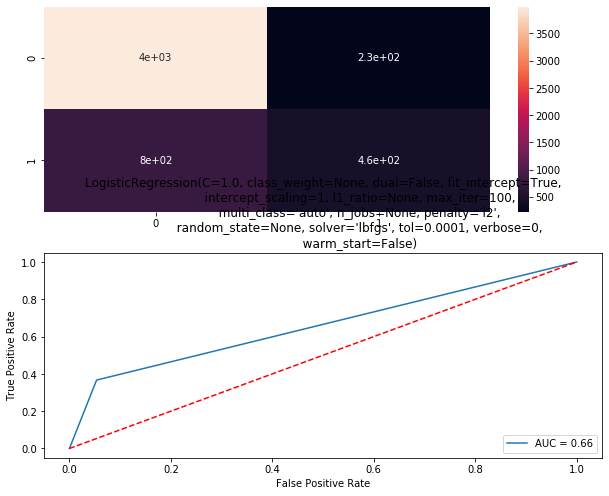

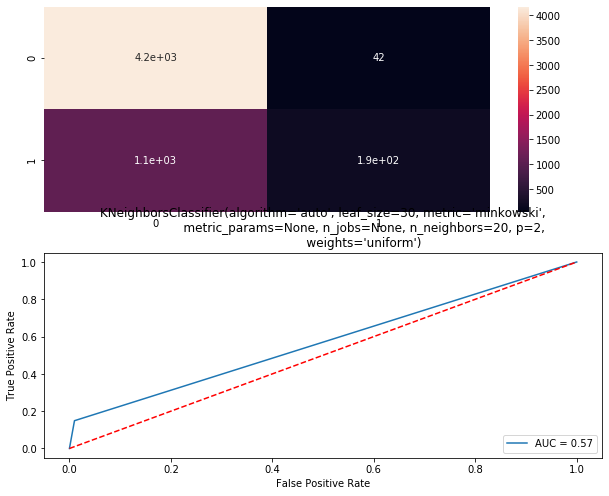

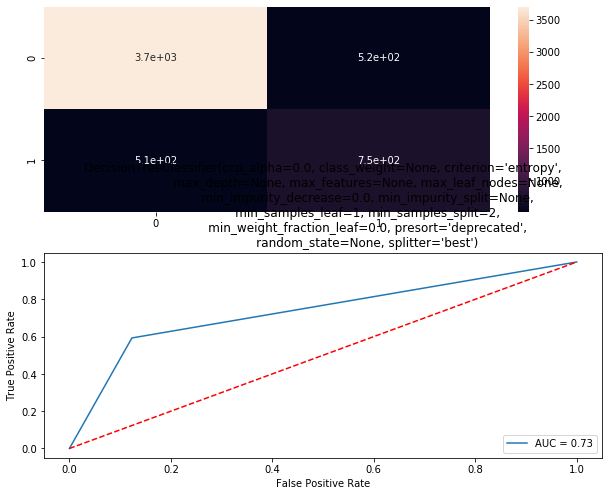

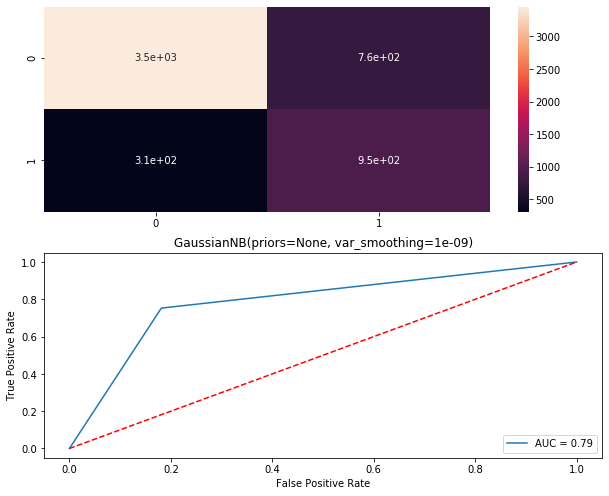

In [76]:
score=[]
cv=[]
rocscore=[]

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

algorithms=[LogisticRegression(penalty='l2'),KNeighborsClassifier(algorithm='auto', n_neighbors= 20, weights='uniform'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    accscore=accuracy_score(y_test,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(y_test,pred))
    print()
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [77]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier,GaussianNB],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.813093,0.795937,0.656674
1,<class 'sklearn.neighbors._classification.KNei...,0.796499,0.798344,0.569511
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.811451,0.809869,0.734773
3,<class 'sklearn.naive_bayes.GaussianNB'>,0.803611,0.792363,0.785790


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=0.20)
dt=DecisionTreeClassifier(criterion= 'entropy', splitter= 'random')
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acs=accuracy_score(y_test,pred)
print("The accuracy score is", acs)
cs=cross_val_score(dt,x,y,cv=5).mean()
print("The cross val score is", cs)
pd.DataFrame(pred).to_csv("census.csv")

The accuracy score is 0.8083515681983954
The cross val score is 0.8058941083460274


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=0.20)
kn=KNeighborsClassifier(algorithm='auto', n_neighbors= 20, weights='uniform')
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
acs=accuracy_score(y_test,pred)
print("The accuracy score is", acs)
cs=cross_val_score(dt,x,y,cv=5).mean()
print("The cross val score is", cs)
pd.DataFrame(pred).to_csv("census.csv")

The accuracy score is 0.7964989059080962
The cross val score is 0.8104897865466537


##by seeing above KNeighborsCLassifier is the best model to predict

In [80]:
from sklearn.externals import joblib
joblib.dump(kn,"Census.pkl")

['Census.pkl']